In [1]:
from tournament.agents.constant import AllC, AllD
from tournament.agents.pavlov import Pavlov
from tournament.agents.q_learning.dqn import DeepQLearner
from tournament.agents.tft import TFTT, GenerousTFT, TitForTat, OmegaTFT
from tournament.environments.single import SingleRuleBasedAgentEnvironment
from tournament.environments.multiple import MultipleRuleBasedAgentEnvironment
from tournament.action import Action
from tournament.agents.agents import AGENTS
from tournament.agents.axelrod_first import (
    Davis,
    Downing,
    Feld,
    Grofman,
    Grudger,
    Joss,
    Nydegger,
    Shubik,
    SteinAndRapoport,
    TidemanAndChieruzzi,
    Tullock,
)
from tournament.agents.axelrod_second import (
    Borufsen,
    Champion,
    Leyvraz,
    Black,
    Cave,
    GraaskampAndKatzen,
    Harrington,
    TidemanAndChieruzzi2,
    Weiner,
    White,
    Adams,
)
from tournament.tournament import RoundRobinTournament

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# plt.rcParams["figure.figsize"] = (20, 12)
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
agents = [TitForTat, Joss, Downing]

env = MultipleRuleBasedAgentEnvironment(agents)

In [3]:

class QNetwork(nn.Module):
    def __init__(self, lookback):
        super().__init__()

        self.flatten = nn.Flatten()
        self.gru = nn.GRU(2, 2, 1, batch_first=True)
        self.layer4 = nn.Linear(2 * lookback, 2)

        nn.init.kaiming_uniform_(self.layer4.weight, mode="fan_in", nonlinearity="relu")

    def forward(self, x):
        x = x.unsqueeze(dim=0)
        x, hn = self.gru(x)
        x = self.flatten(x)
        x = torch.relu(self.layer4(x))

        return x

class QLearningTest(DeepQLearner):
    def __init__(self):
        super().__init__()

        self.lookback = 4
        self.epsilon = 0.2

        self._learning_rate = 0.01
        self._discount_rate = 0.99
        self._q_network = QNetwork(self.lookback)


agent = QLearningTest()

In [4]:
env.train(
    trainee=agent,
    limit=100,
    epochs=500,
)

[19:56:23] Commencement of training.
[19:56:25] Completed epoch 1: 1.4930769484661748
[19:56:26] Completed epoch 2: 1.4915384742330873
[19:56:27] Completed epoch 3: 1.5076923161553917
[19:56:28] Completed epoch 4: 1.521602570449877
[19:56:29] Completed epoch 5: 1.5329487230265684
[19:56:31] Completed epoch 6: 1.5394017136332514
[19:56:32] Completed epoch 7: 1.5406776593046916
[19:56:33] Completed epoch 8: 1.5410096185582718
[19:56:34] Completed epoch 9: 1.5438604016814268
[19:56:35] Completed epoch 10: 1.542474361513284
[19:56:36] Completed epoch 11: 1.5466433589514705
[19:56:38] Completed epoch 12: 1.5473397457055145
[19:56:40] Completed epoch 13: 1.5440828421897057
[19:56:41] Completed epoch 14: 1.54962454393806
[19:56:42] Completed epoch 15: 1.549205129897745
[19:56:43] Completed epoch 16: 1.5462339759458026
[19:56:45] Completed epoch 17: 1.548220212654873
[19:56:46] Completed epoch 18: 1.5479487193592318
[19:56:47] Completed epoch 19: 1.5483198393929565
[19:56:48] Completed epoch 2

In [5]:
print(agent._q_network)
print(env.counts)

s = sum(env.counts.values())
print({a: env.counts[a] / s for a in env.counts})

QNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (gru): GRU(2, 2, batch_first=True)
  (layer4): Linear(in_features=8, out_features=2, bias=True)
)
{<Action.COOPERATE: 0>: 134995, <Action.DEFECT: 1>: 15005}
{<Action.COOPERATE: 0>: 0.8999666666666667, <Action.DEFECT: 1>: 0.10003333333333334}


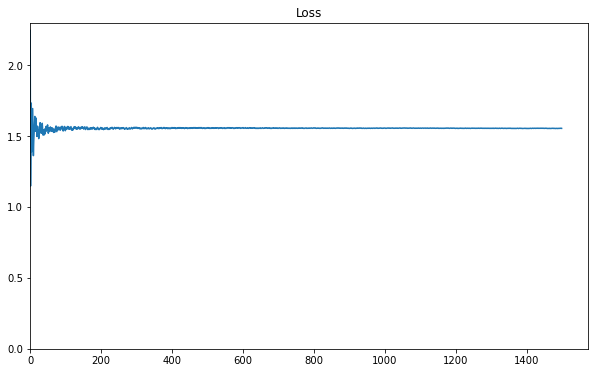

In [6]:
plt.title("Loss")
plt.plot(env.metric_history)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

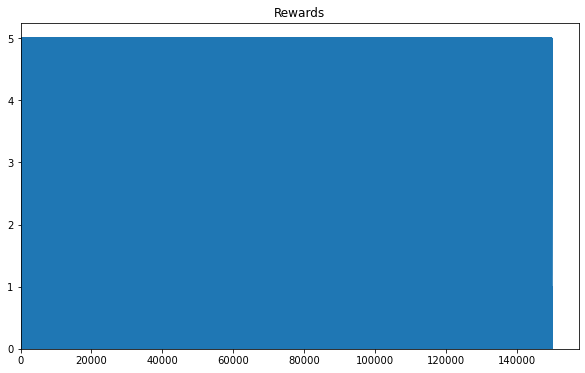

In [7]:
plt.title("Rewards")
plt.plot(env.rewards)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

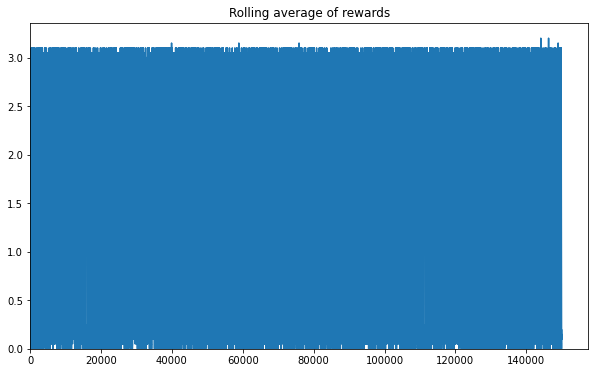

In [8]:
N = 20

plt.title("Rolling average of rewards")
plt.plot(np.convolve(env.rewards, np.ones(N), mode='valid') / N)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

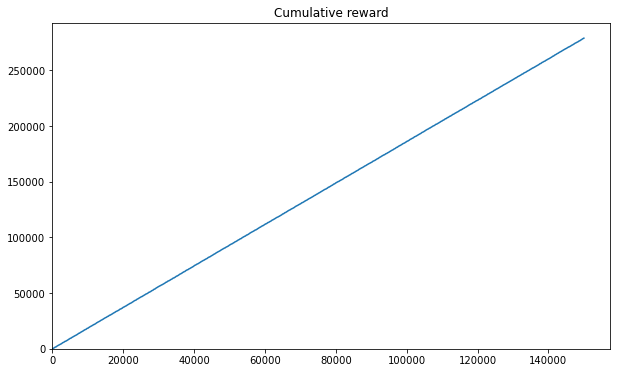

In [9]:
plt.title("Cumulative reward")
plt.plot(np.cumsum(env.rewards))
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

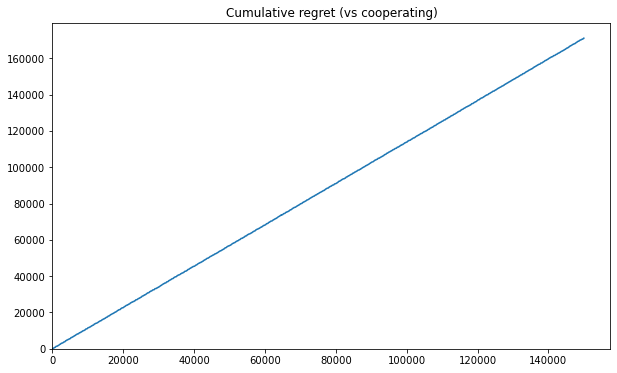

In [10]:
plt.title("Cumulative regret (vs cooperating)")
plt.plot(np.cumsum(3 - np.array(env.rewards)))
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

[{<Action.COOPERATE: 0>: 0.8566666666666667, <Action.DEFECT: 1>: 0.14333333333333334}, {<Action.COOPERATE: 0>: 0.94, <Action.DEFECT: 1>: 0.06}, {<Action.COOPERATE: 0>: 0.9166666666666666, <Action.DEFECT: 1>: 0.08333333333333333}, {<Action.COOPERATE: 0>: 0.9033333333333333, <Action.DEFECT: 1>: 0.09666666666666666}, {<Action.COOPERATE: 0>: 0.89, <Action.DEFECT: 1>: 0.11}, {<Action.COOPERATE: 0>: 0.9233333333333333, <Action.DEFECT: 1>: 0.07666666666666666}, {<Action.COOPERATE: 0>: 0.8866666666666667, <Action.DEFECT: 1>: 0.11333333333333333}, {<Action.COOPERATE: 0>: 0.8966666666666666, <Action.DEFECT: 1>: 0.10333333333333333}, {<Action.COOPERATE: 0>: 0.9066666666666666, <Action.DEFECT: 1>: 0.09333333333333334}, {<Action.COOPERATE: 0>: 0.8766666666666667, <Action.DEFECT: 1>: 0.12333333333333334}, {<Action.COOPERATE: 0>: 0.89, <Action.DEFECT: 1>: 0.11}, {<Action.COOPERATE: 0>: 0.9166666666666666, <Action.DEFECT: 1>: 0.08333333333333333}, {<Action.COOPERATE: 0>: 0.8666666666666667, <Action.DE

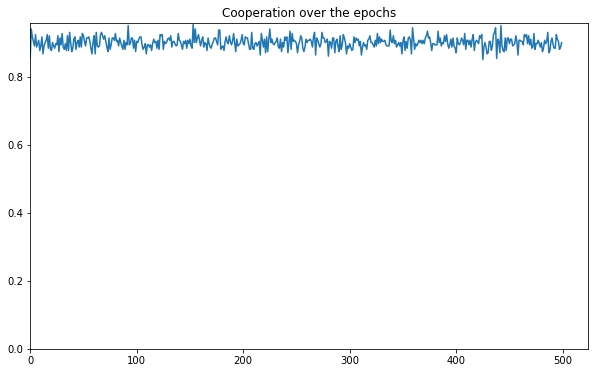

In [11]:
plt.title("Cooperation over the epochs")
print(env.normalised_epoch_counts)
plt.plot([x[Action.COOPERATE] for x in env.normalised_epoch_counts])
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

In [15]:
torch.save(agent._q_network.state_dict(), "models/drqn/gru-1.pt")

In [13]:
agent._q_network.eval()

QNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (gru): GRU(2, 2, batch_first=True)
  (layer4): Linear(in_features=8, out_features=2, bias=True)
)

In [14]:
tournament = RoundRobinTournament(AGENTS, [agent])

scores, times = tournament.play(
    continuation_probability=0.99654, repetitions=20, jobs=12
)

results = [
    (agent, round(sum(scores[agent]) / len(scores[agent])), sum(times[agent]))
    for agent in scores
]
results.sort(key=lambda x: x[1], reverse=True)

for c, score, time in results:
    print(f"{c.__name__:<30} {score:<20} {time:<20}")


100%|██████████| 961/961 [03:55<00:00,  4.08matches/s] 

TitForTat                      821                  13.168757           
GraaskampAndKatzen        817                  14.763997           
SteinAndRapoport               807                  29.98586999999999   
Weiner                 792                  30.442491999999998  
White              785                  17.433975           
QLearningTest                  782                  218.1223720000001   
Black              781                  16.558653999999997  
OmegaTFT                       779                  12.652504000000002  
Pavlov                         778                  11.525397           
GenerousTFT                    774                  14.190078999999997  
Davis                          770                  15.312144000000002  
TidemanAndChieruzzi2    769                  15.338301999999999  
Shubik                         768                  9.812743            
Grudger                        767                  10.512209000000002  
GradualTFT            

In [17]:
from tournament.agent import Agent
from tournament.match import Match

class ManualAgent(Agent):
    def play_move(self, history, opp_history):
        move = input("Move: ")
        if move == "C":
            return Action.COOPERATE
        elif move == "D":
            return Action.DEFECT
        elif move == "Q":
            raise RuntimeError()

manual_agent = ManualAgent()

match = Match(agent, manual_agent)

for i, ((move1, move2), (score1, score2), (reward1, reward2)) in enumerate(
    match.play_moves(continuation_probability=0.99654, limit=1000, noise=0)
):
    print(
        f"{i:<4} | \t {move1:<20} {score1:<8} {f'({reward1})':<20} {move2:<20} {score2:<8} {f'({reward2})':<10}"
    )

0    | 	 Action.COOPERATE     3        (3)                  Action.COOPERATE     3        (3)       
1    | 	 Action.COOPERATE     6        (3)                  Action.COOPERATE     6        (3)       
2    | 	 Action.COOPERATE     9        (3)                  Action.COOPERATE     9        (3)       
3    | 	 Action.COOPERATE     12       (3)                  Action.COOPERATE     12       (3)       
4    | 	 Action.COOPERATE     15       (3)                  Action.COOPERATE     15       (3)       
5    | 	 Action.COOPERATE     18       (3)                  Action.COOPERATE     18       (3)       
6    | 	 Action.COOPERATE     18       (0)                  Action.DEFECT        23       (5)       
7    | 	 Action.COOPERATE     21       (3)                  Action.COOPERATE     26       (3)       
8    | 	 Action.COOPERATE     21       (0)                  Action.DEFECT        31       (5)       
9    | 	 Action.COOPERATE     21       (0)                  Action.DEFECT        36       (

KeyError: (<Action.COOPERATE: 0>, None)